# Business Analytics Group Project

## Step 1: Data cleaning



In [227]:
%matplotlib inline
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/HR_Engagement_Sat_Sales.csv")

print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
ID                                       14999 non-null int64
Name                                     14997 non-null object
Department                               14999 non-null object
GEO                                      14999 non-null object
Role                                     14999 non-null object
Rising_Star                              21 non-null float64
Will_Relocate                            14999 non-null int64
Critical                                 480 non-null float64
Trending Perf                            14999 non-null int64
Talent_Level                             14999 non-null int64
Validated_Talent_Level                   14999 non-null int64
Percent_Remote                           14999 non-null float64
EMP_Sat_OnPrem_1                         14871 non-null float64
EMP_Sat_OnPrem_2                         14871 non-null float64
EMP_Sat_OnPrem

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,...,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,...,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,...,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,...,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,...,5,3,5,1,2,5,4,3149,80,10


Chose important variables based on business understanding.

In [228]:
data = data.loc[:,["Department", "GEO","Role","Will_Relocate","Critical","Percent_Remote","last_evaluation","number_project", "average_montly_hours","time_spend_company","Work_accident","promotion_last_5years","salary","Gender","LinkedIn_Hits","Emp_Identity","Emp_Role","Emp_Position","Emp_Title","Sensor_StepCount","Sensor_Heartbeat(Average/Min)","Sensor_Proximity(1-highest/10-lowest)","left_Company"]]
data['Critical'] = data['Critical'].replace(np.nan,0)

Checked the number of observations in each class.

In [229]:
data['left_Company'][data['left_Company']==0].count()

11428

In [230]:
data['left_Company'][data['left_Company']==1].count()

3571

Since the target variable is unbalanced, we upsample the class with fewer observations, which is class 1.

In [231]:
#from sklearn.utils import resample

# datasample = resample(data[data['left_Company']==1], # Indexable data-structures as input
#                                     replace=True, # Implements resampling with replacement.
#                                     n_samples=11428, # Number of samples to generate.
#                                     random_state=11)

In [232]:
#datasample['left_Company'].value_counts()

Extracted observations in class 0, and then concatenate it with the upsampled obervations in class 1. Then we will get a data set with balanced target classes.

In [233]:
#datazero = data[data['left_Company']==0]

In [234]:
#datazero['left_Company'].value_counts()

In [235]:
#df = pd.concat([datasample, datazero], ignore_index=True)

In [236]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22856 entries, 0 to 22855
Data columns (total 23 columns):
Department                               22856 non-null object
GEO                                      22856 non-null object
Role                                     22856 non-null int64
Will_Relocate                            22856 non-null int64
Critical                                 22856 non-null float64
Percent_Remote                           22856 non-null float64
last_evaluation                          22856 non-null float64
number_project                           22856 non-null int64
average_montly_hours                     22856 non-null int64
time_spend_company                       22856 non-null int64
Work_accident                            22856 non-null int64
promotion_last_5years                    22856 non-null int64
salary                                   22856 non-null int64
Gender                                   22856 non-null int64
LinkedIn_Hits  

,Department,GEO,Role,Will_Relocate,Critical,Percent_Remote,last_evaluation,number_project,average_montly_hours,time_spend_company,...,Gender,LinkedIn_Hits,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),left_Company
0,Sales,China,1,0,0.0,0.8,0.82,7,267,4,...,1,7,2,1,1,1,1384,90,3,1
1,Human Resources,Japan,2,1,0.0,0.4,0.54,2,153,3,...,0,47,2,2,2,2,1030,68,9,1
2,Operations,Colombia,3,1,0.0,0.8,0.96,7,264,4,...,0,2,2,2,2,1,1540,90,5,1
3,Human Resources,France,1,1,0.0,0.8,1.00,5,234,5,...,1,8,1,2,1,2,1837,90,2,1
4,IT,Colombia,3,1,1.0,0.4,0.55,2,128,3,...,0,53,4,2,1,2,6662,74,6,1


Changed string into binary & ordinal & categorical variables.

In [237]:
dfencode = data.iloc[:,[0,1,2,12,13]]
dfencode.head()

,Department,GEO,Role,salary,Gender
0,Operations,US,VP,low,M
1,Sales,UK,Senior Director,low,F
2,Finance,France,Senior Director,medium,F
3,Human Resources,China,Senior Director,high,M
4,IT,Korea,Director,low,F


In [238]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
dfencode['Department']=le.fit_transform(dfencode['Department'])
le.classes_

C:\Users\knigh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array(['Finance', 'Human Resources', 'IT', 'Operations', 'Sales',
       'Warehouse'], dtype=object)

In [239]:
dfencode['GEO']=le.fit_transform(dfencode['GEO'])
le.classes_

C:\Users\knigh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array(['Australia', 'China', 'Colombia', 'France', 'Japan', 'Korea',
       'Turkey', 'UK', 'US'], dtype=object)

In [240]:
dfencode.loc[dfencode["Role"]=="Level 2-4","Role"]=1
dfencode.loc[dfencode["Role"]=="Level 1","Role"]=0
dfencode.loc[dfencode["Role"]=="Manager","Role"]=2
dfencode.loc[dfencode["Role"]=="Senior Manager","Role"]=3
dfencode.loc[dfencode["Role"]=="Director","Role"]=4
dfencode.loc[dfencode["Role"]=="Senior Director","Role"]=5
dfencode.loc[dfencode["Role"]=="VP","Role"]=6

dfencode.head(10)

C:\Users\knigh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Department,GEO,Role,salary,Gender
0,3,8,6,low,M
1,4,7,5,low,F
2,0,3,5,medium,F
3,1,1,5,high,M
4,2,5,4,low,F
5,5,2,4,medium,F
6,3,0,4,high,F
7,4,6,4,medium,F
8,0,4,4,high,M
9,1,7,4,medium,F


In [241]:
dfencode.loc[dfencode["salary"]=="low","salary"]=0
dfencode.loc[dfencode["salary"]=="medium","salary"]=1
dfencode.loc[dfencode["salary"]=="high","salary"]=2

dfencode.head(10)

C:\Users\knigh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Department,GEO,Role,salary,Gender
0,3,8,6,0,M
1,4,7,5,0,F
2,0,3,5,1,F
3,1,1,5,2,M
4,2,5,4,0,F
5,5,2,4,1,F
6,3,0,4,2,F
7,4,6,4,1,F
8,0,4,4,2,M
9,1,7,4,1,F


In [242]:
dfencode['Gender']=le.fit_transform(dfencode['Gender'])
le.classes_

C:\Users\knigh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array(['F', 'M'], dtype=object)

In [243]:
dfencode.head()

,Department,GEO,Role,salary,Gender
0,3,8,6,0,1
1,4,7,5,0,0
2,0,3,5,1,0
3,1,1,5,2,1
4,2,5,4,0,0


In [244]:
data['Gender'] = dfencode['Gender'] # m=1, f=0
data['Role'] = dfencode['Role']
data['salary'] = dfencode['salary']
data.head()

,Department,GEO,Role,Will_Relocate,Critical,Percent_Remote,last_evaluation,number_project,average_montly_hours,time_spend_company,...,Gender,LinkedIn_Hits,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),left_Company
0,Operations,US,6,0,1.0,0.4,0.36,3,168,3,...,1,5,1,1,2,1,1841,61,9,0
1,Sales,UK,5,0,0.0,0.4,0.36,5,159,2,...,0,58,2,1,2,1,1990,90,8,0
2,Finance,France,5,0,0.0,0.4,0.36,2,282,3,...,0,42,1,1,2,2,3193,80,8,0
3,Human Resources,China,5,0,0.0,0.4,0.36,4,278,4,...,1,37,2,1,2,1,3248,77,6,0
4,IT,Korea,4,0,0.0,0.4,0.36,6,256,5,...,0,6,1,1,2,1,3149,80,10,0


In [245]:
de =dfencode.iloc[:,[0,1]]
de.head()

,Department,GEO
0,3,8
1,4,7
2,0,3
3,1,1
4,2,5


In [246]:
enc = preprocessing.OneHotEncoder()

enc.fit(de)

onehotlabels = enc.transform(de).toarray()

In [247]:
header=['D_Finance', 'D_Human Resources', 'D_IT', 'D_Operations', 'D_Sales', 'D_Warehouse', 'G_Australia', 'G_China', 
        'G_Colombia', 'G_France', 'G_Japan', 'G_Korea', 'G_Turkey', 'G_UK', 'G_US']
df_2 = pd.DataFrame(onehotlabels, columns=header)
df_2.head()

,D_Finance,D_Human Resources,D_IT,D_Operations,D_Sales,D_Warehouse,G_Australia,G_China,G_Colombia,G_France,G_Japan,G_Korea,G_Turkey,G_UK,G_US
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Substituted untransferred columns with new ones, got the final encoded dataframe.

In [248]:
df_1 = data.iloc[:,2:23]
df_1.head()

,Role,Will_Relocate,Critical,Percent_Remote,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,...,Gender,LinkedIn_Hits,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),left_Company
0,6,0,1.0,0.4,0.36,3,168,3,1,0,...,1,5,1,1,2,1,1841,61,9,0
1,5,0,0.0,0.4,0.36,5,159,2,0,0,...,0,58,2,1,2,1,1990,90,8,0
2,5,0,0.0,0.4,0.36,2,282,3,0,0,...,0,42,1,1,2,2,3193,80,8,0
3,5,0,0.0,0.4,0.36,4,278,4,1,0,...,1,37,2,1,2,1,3248,77,6,0
4,4,0,0.0,0.4,0.36,6,256,5,0,0,...,0,6,1,1,2,1,3149,80,10,0


In [249]:
dfencode = pd.concat([df_2,df_1],axis=1)
print(dfencode.shape)
dfencode.head()

(14999, 36)


,D_Finance,D_Human Resources,D_IT,D_Operations,D_Sales,D_Warehouse,G_Australia,G_China,G_Colombia,G_France,...,Gender,LinkedIn_Hits,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),left_Company
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,5,1,1,2,1,1841,61,9,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,58,2,1,2,1,1990,90,8,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,42,1,1,2,2,3193,80,8,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,37,2,1,2,1,3248,77,6,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6,1,1,2,1,3149,80,10,0


In [250]:
dfencode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 36 columns):
D_Finance                                14999 non-null float64
D_Human Resources                        14999 non-null float64
D_IT                                     14999 non-null float64
D_Operations                             14999 non-null float64
D_Sales                                  14999 non-null float64
D_Warehouse                              14999 non-null float64
G_Australia                              14999 non-null float64
G_China                                  14999 non-null float64
G_Colombia                               14999 non-null float64
G_France                                 14999 non-null float64
G_Japan                                  14999 non-null float64
G_Korea                                  14999 non-null float64
G_Turkey                                 14999 non-null float64
G_UK                                     14999 non-null flo

In [189]:
dfencode['Emp_Title'].value_counts()

2    10844
1     8554
3     2535
4      883
5       40
Name: Emp_Title, dtype: int64

## Model building

Specified the x and y from data set.

In [251]:
x = dfencode.iloc[:,0:35]
y = dfencode['left_Company']

In [191]:
x.head()

,D_Finance,D_Human Resources,D_IT,D_Operations,D_Sales,D_Warehouse,G_Australia,G_China,G_Colombia,G_France,...,salary,Gender,LinkedIn_Hits,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,7,2,1,1,1,1384,90,3
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,47,2,2,2,2,1030,68,9
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,2,2,2,2,1,1540,90,5
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,8,1,2,1,2,1837,90,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,53,4,2,1,2,6662,74,6


In [192]:
x.columns

Index(['D_Finance', 'D_Human Resources', 'D_IT', 'D_Operations', 'D_Sales',
       'D_Warehouse', 'G_Australia', 'G_China', 'G_Colombia', 'G_France',
       'G_Japan', 'G_Korea', 'G_Turkey', 'G_UK', 'G_US', 'Role',
       'Will_Relocate', 'Critical', 'Percent_Remote', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'salary', 'Gender',
       'LinkedIn_Hits', 'Emp_Identity', 'Emp_Role', 'Emp_Position',
       'Emp_Title', 'Sensor_StepCount', 'Sensor_Heartbeat(Average/Min)',
       'Sensor_Proximity(1-highest/10-lowest)'],
      dtype='object')

Split the data into training data and test data.

### KNN

In [266]:
cdata = pd.read_csv("data/processed.csv", index_col = 0)
cdata.head()

,Finance,HR,IT,Operations,Sales,Australia,China,France,Japan,Korea,...,Gender,LinkedIn_Hits,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),left_Company
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,5,1,1,2,1,1841,61,9,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,58,2,1,2,1,1990,90,8,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,42,1,1,2,2,3193,80,8,0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,37,2,1,2,1,3248,77,6,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,6,1,1,2,1,3149,80,10,0


In [269]:
x = cdata.iloc[:,0:33]
y = cdata['left_Company']

In [286]:
from sklearn.model_selection import train_test_split

X_train, X_valtest, y_train, y_valtest = train_test_split(x, y, test_size=0.4, random_state=11, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=11, stratify=y_valtest)

In [273]:
# Used GradientBoostingClassifier to check the importance of features

# from sklearn.ensemble import GradientBoostingClassifier

# clf = GradientBoostingClassifier()
# clf.fit(X_train, y_train)
# clf.score(X_train, y_train)
# clf.feature_importances_

array([0.        , 0.        , 0.00444454, 0.        , 0.00252107,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00126644, 0.00103938,
       0.01285721, 0.04033248, 0.08561112, 0.12647169, 0.23277216,
       0.05562301, 0.0099572 , 0.01236689, 0.06596891, 0.        ,
       0.00434558, 0.        , 0.00874452, 0.        , 0.        ,
       0.27133371, 0.06434409, 0.        ])

Another feature selection method.

In [287]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)
print(clf.feature_importances_)

[0.00238633 0.00217102 0.00200134 0.00247744 0.00253514 0.00199987
 0.00194691 0.00264732 0.00244336 0.00198844 0.00258357 0.00140325
 0.00180207 0.00567818 0.00307592 0.00282492 0.10561751 0.091871
 0.11943641 0.07722463 0.03955262 0.01004245 0.00120109 0.02164441
 0.00378669 0.03223306 0.03915267 0.07714247 0.01908332 0.02617116
 0.18369371 0.09887833 0.0133034 ]


In [288]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_train=pd.DataFrame(X_new)
X_val=model.transform(X_val)
X_val=pd.DataFrame(X_val)
X_test=model.transform(X_test)
X_test=pd.DataFrame(X_test)
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,0.8,0.94,4.0,224.0,2.0,10.0,4.0,4.0,4653.0,78.0
1,0.8,0.88,6.0,263.0,4.0,1.0,2.0,1.0,1258.0,90.0
2,0.8,0.85,4.0,160.0,5.0,10.0,4.0,3.0,4018.0,76.0
3,0.8,0.93,3.0,271.0,5.0,5.0,3.0,2.0,4880.0,79.0
4,0.4,0.56,4.0,159.0,3.0,34.0,2.0,2.0,1442.0,90.0


In [289]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [316]:
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
X_test = pd.DataFrame(X_test)

In [315]:
X_train.shape

(8999, 10)

Used variables with high importance as input variables based on GradientBoostingClassifier.

In [257]:
# xtrain = x_train.iloc[:,[17,18,19,20,21,22,24,25,27,32,33]]
# xtest = x_test.iloc[:,[17,18,19,20,21,22,24,25,27,32,33]]
# xtrain.head()

,Critical,Percent_Remote,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary,LinkedIn_Hits,Sensor_StepCount,Sensor_Heartbeat(Average/Min)
5391,0.0,0.4,0.62,4,150,3,1,2,9,1620,85
9755,0.0,0.8,0.81,6,309,4,0,0,6,1866,87
11048,0.0,0.8,0.86,5,222,3,0,0,3,5555,76
9820,0.0,0.8,0.82,3,192,3,0,0,4,5179,78
10211,0.0,0.8,0.83,5,241,2,0,1,7,4413,79


Standardized x variables.

In [196]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(xtrain)
# xsttrain = sc.transform(xtrain)
# xsttest = sc.transform(xtest)

In [197]:
# xsttrain = pd.DataFrame(xsttrain, columns=xtrain.columns)
# xsttrain.head(20)

,Critical,Percent_Remote,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary,LinkedIn_Hits,Sensor_StepCount,Sensor_Heartbeat(Average/Min)
0,-0.190628,-1.111987,-1.591991,0.797504,-0.527451,-1.234173,-0.125479,2.420766,0.150594,-0.553615,1.023327
1,-0.190628,-1.111987,-1.260756,-1.246923,-0.913986,-0.478508,-0.125479,-0.867833,1.109478,-0.883153,-0.637321
2,-0.190628,0.928697,1.168301,2.160456,1.920601,0.277158,-0.125479,0.776466,-0.648476,-0.973827,0.786092
3,-0.190628,0.928697,1.389124,0.797504,0.484901,1.032823,-0.125479,-0.867833,-0.541933,-1.024605,1.379180
4,-0.190628,0.928697,1.057889,1.478980,1.368409,0.277158,-0.125479,-0.867833,-0.861561,-0.972791,0.904709
5,-0.190628,0.928697,1.499536,0.116029,1.092313,1.788489,-0.125479,0.776466,-0.541933,-0.995589,1.023327
6,-0.190628,0.928697,0.947478,2.160456,1.497254,0.277158,-0.125479,-0.867833,-0.861561,-0.804913,1.141945
7,-0.190628,0.928697,1.554742,0.797504,1.092313,1.032823,-0.125479,0.776466,-0.914833,-1.000253,1.379180
8,-0.190628,0.928697,0.561037,0.116029,1.018687,-0.478508,-0.125479,0.776466,-0.755019,1.191485,-0.162850
9,-0.190628,0.928697,0.947478,0.116029,-1.079644,-0.478508,-0.125479,-0.867833,-0.701747,1.428794,0.074385


Plotted fitting curve.

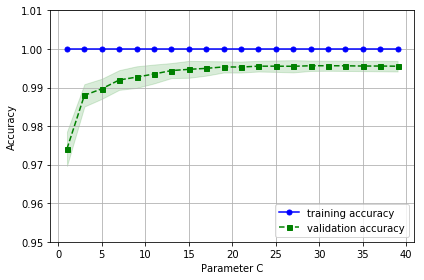

In [293]:
# Fitting curve (aka validation curve)
# Determine training and test scores for varying parameter values.
from sklearn.model_selection import validation_curve


np.random.seed(11) #the seed used by the random number generator for np

# Specify possible parameter values for C.
# Parameter C: Inverse of regularization strength; 
# C must be a positive float; smaller values specify stronger regularization.
param_range = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]

# Compute scores for an estimator with different values of a specified parameter. 
# This is similar to grid search with one parameter. 
# However, this will also compute training scores and is merely a utility for plotting the results.

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                estimator=neighbors.KNeighborsClassifier(p=2, metric='minkowski',weights="distance",algorithm='auto') ,
                X=X_train, 
                y=y_train, 
                param_name="n_neighbors", # parameter C: Inverse of regularization strength; must be a positive float. Smaller values of paramter C specify stronger regularization.
                param_range=param_range,
                cv=5,     #5-fold cross-validation
                scoring="roc_auc") # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1.01]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           #display the figure



Did GridSearch to tune parameters. Found best K as 31.

In [294]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49],
                               'weights':['uniform','distance']}],
                  scoring='roc_auc',
                  cv=5,
                  n_jobs=4)
gs_knn = gs_knn.fit(X_train, y_train)          

In [295]:
print(gs_knn.best_score_)
print(gs_knn.best_params_)
print(gs_knn.best_estimator_)

0.995654838552321
{'n_neighbors': 31, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='distance')


Used different evaluations to evaluate the model.

Accuracy (out-of-sample): 0.97
Accuracy (in-sample): 1.00
Confusion matrix, without normalization
[[2235   51]
 [  30  684]]
Normalized confusion matrix
[[0.97769029 0.02230971]
 [0.04201681 0.95798319]]


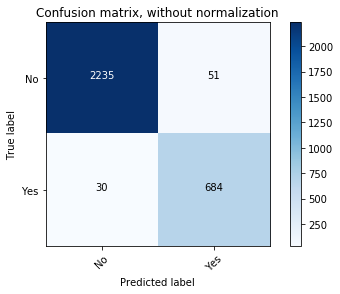

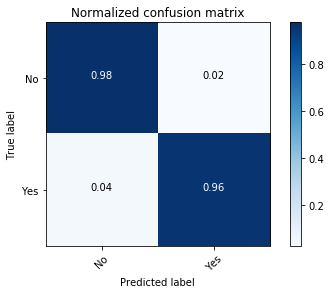


Other accuracy report:
             precision    recall  f1-score   support

       Stay       0.76      0.75      0.75      2286
      Leave       0.22      0.23      0.23       714

avg / total       0.63      0.63      0.63      3000

Roc-score: 0.992 (+/- 0.009)
[0.99015177 0.99837799 0.98923505 0.99519518 0.98597713]
Recall-score: 0.952 (+/- 0.036)
[0.95104895 0.98601399 0.93706294 0.93706294 0.95070423]


In [304]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

import itertools

knn = neighbors.KNeighborsClassifier(n_neighbors=31, p=2, metric='minkowski',weights="distance",algorithm='auto') 
knn1 = knn.fit(X_train, y_train) 
    
y_pred = knn1.predict(X_val)
y_pred_insample = knn1.predict(X_train)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_val, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# # Confusion matrix
# cnf_matrix = confusion_matrix(y_val, y_pred)
# #np.set_printoptions(precision=2)
# #cm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
# print('\nConfusion matrix, without normalization:\n',cnf_matrix)
# print('Normalized confusion matrix:\n',cm)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No','Yes'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No','Yes'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Other report
print('\nOther accuracy report:\n'+ classification_report(y_test, y_pred, target_names=['Stay','Leave']))
scores=cross_val_score(knn,X_val, y_val, cv=5, scoring='roc_auc')
print("Roc-score: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
print(scores)
scores_f1=cross_val_score(knn, X_val, y_val, cv=5, scoring='recall')
print("Recall-score: %0.3f (+/- %0.3f)" % (scores_f1.mean(), scores_f1.std() * 2))
print(scores_f1)

In [305]:
prob = knn.predict_proba(X_val)
prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83419687, 0.16580313]])

Plotted learning curve.

In [306]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

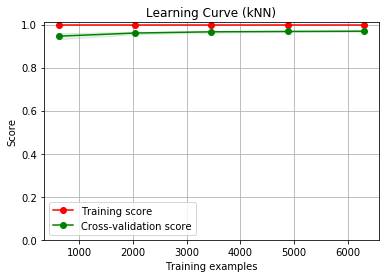

In [307]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


#title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=11)
#estimator = 
#plot_learning_curve(estimator, title, x, y, (0.0, 1.01), cv=cv, n_jobs=4)

#plt.show()

title = "Learning Curve (kNN)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=11)
estimator = knn
plot_learning_curve(estimator, title,X_train, y_train, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

## Compare models

Compare ROC score.

In [309]:


scores=cross_val_score(knn, X_val, y_val, 
                         scoring='roc_auc', cv=5)
print('CV ROC-score: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))


# scores=cross_val_score(gs_dt2, X_train, y_train, 
#                          scoring='accuracy', cv=10)
# print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
#                                       np.std(scores)))


CV ROC-score: 0.992 +/- 0.004


Drew ROC curve

5-fold cross validation:

ROC AUC: 0.86 (+/- 0.01) [Logistic regression]
ROC AUC: 0.82 (+/- 0.01) [Decision tree]
ROC AUC: 1.00 (+/- 0.00) [KNN]


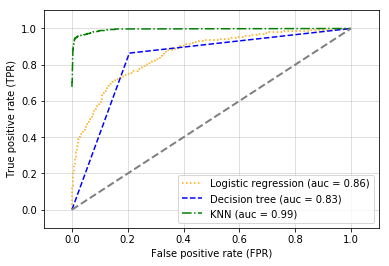

In [312]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Logistic Regression Classifier
clf1 = LogisticRegression(penalty='l1', 
                          C=7.7426368,
                          random_state=None)

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

# kNN Classifier
clf3 = knn

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']
all_clf = [clf1, clf2, clf3]

print('5-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X_train,
                             y=y_train,
                             cv=5,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

colors = [ 'orange', 'blue', 'green']      #Colors for visualization
linestyles = [':', '--', '-.', '-']        #Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_val)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_val, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

In [317]:
X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])

In [318]:
knnclf2 = neighbors.KNeighborsClassifier(n_neighbors=31, p=2, metric='minkowski',weights="distance",algorithm='auto') 
knnclf2 = knnclf2.fit(X_train, y_train) 